# Stochastic SIR

* Discrete time 
* Stochastic $\sim B(X,p)$
* Multi-run simulation
* Extract their statistical averages.
* Basic reproduction number $R_0 = 3.0$

## Modules

In [1]:
# Data Wrangling
import numpy as np

# Network Data Analysis 
import networkx as nx

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt 
#plt.style.use('seaborn-white')
import matplotlib.ticker as ticker
%pylab inline

# Geo-Spatial Data Analysis
#import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Other Utilities
from operator import itemgetter
from collections import defaultdict

# Custom Modules
import digital_epidemiology as depi

# Reload Custom Modules
from importlib import reload
depi = reload(depi)

Populating the interactive namespace from numpy and matplotlib


### Parameters

In [2]:
mu = 0.2           # Recovery rate 
R0 = 3.0           # Basic reproduction number 
beta = R0 * mu     # Transmission rate

#print("The average infectious period is ", 1./mu, " days")

### Multi-Run Simulation

In [3]:
I_dict = defaultdict(list)   # Define the time series dictionary for I 
R_final = []                 # Define the multi-run list for final R
nrun = 1000                  # Set the number of runs  
Irun = []                    # Define the multi-run list of lists for I 

for run in range(0,nrun):
    
    # Set initial conditions at each run 
    N = 10000         # Population size
    I = 10            # Infected & infectious subpopulation
    S = N - I         # Susceptible subpopulation 
    R = 0             # Removed / Recovered subpopulation
    t = 0             # Initialize the clock
    
    I_list = []         # Define the single-run list for I 
    I_list.append(I)    # Initialize the single-run list for I
    I_dict[t].append(I) # Initialize the time series dictionary for I
    
    # Implement the dynamical model 
    while I>0:
        
        i = float(I)/N
        p = beta * i
        
        deltaSI = np.random.binomial(S,p)
        deltaIR = np.random.binomial(I,mu)
        
        S = S - deltaSI
        I = I + deltaSI - deltaIR
        R = R + deltaIR
        
        t += 1
        r = float(R)/N
        
        I_list.append(I)
        I_dict[t].append(I)
    
    R_final.append(r)
    Irun.append(I_list)

#print("The average final attack rate is ", np.average(np.array(R_final)))

### Visualization

NameError: name 'It' is not defined

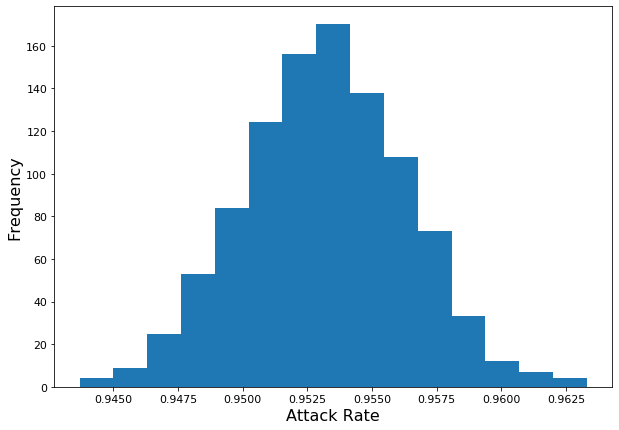

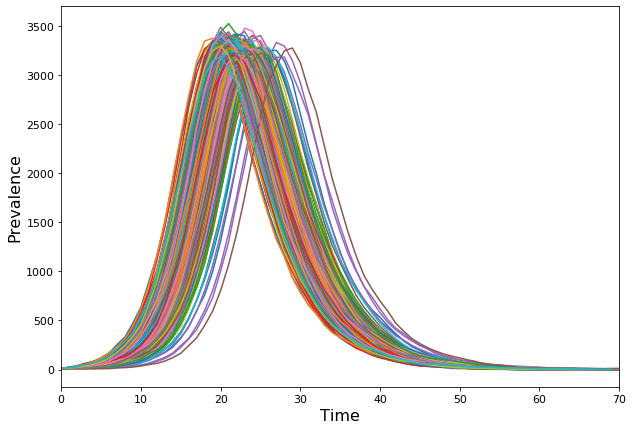

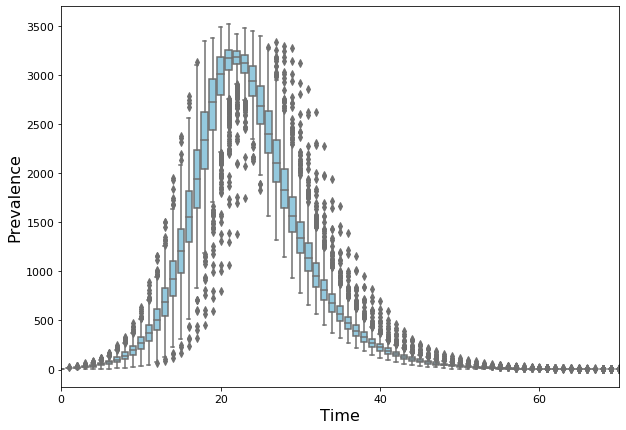

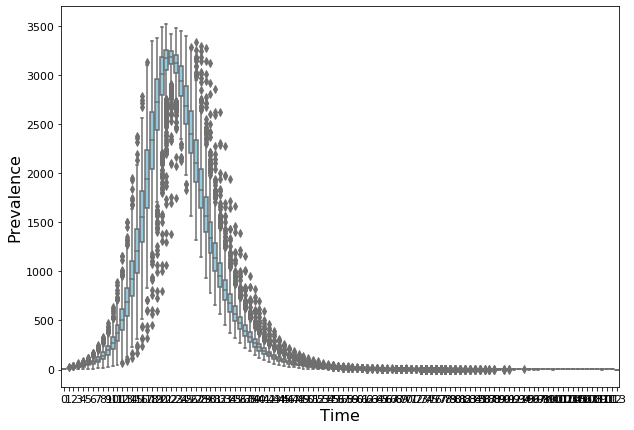

In [4]:
# 1. Plot the distribution of final attack rates
plt.figure(figsize = (10,7))
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.xlabel('Attack Rate', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)

a = plt.hist(R_final, bins = 15)

# 2. Plot the ensemble of trajectories
plt.figure(figsize = (10,7))
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Prevalence', fontsize = 16)
plt.xlim([0, 70])

for run in Irun: 
    plt.plot(range(0,len(run)),run)
    
    
# 3. Make a box plot for prevalence
full_array = [np.array(I_dict[t]) for t in I_dict]

plt.figure(figsize = (10,7))
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Prevalence', fontsize = 16)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

ax = sns.boxplot(data = full_array, color = 'skyblue')
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.xlim([0, 70])

# Compare the deterministic simulation vs. the average prevalence of the stochastic version
full_average = [np.average(np.array(I_dict[t])) for t in I_dict]

### 4. Make a box plot for prevalence: deterministic vs. averaged stochastic
plt.figure(figsize = (10,7))
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Prevalence', fontsize = 16)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

ax = sns.boxplot(data = full_array, color = 'skyblue')

plt.plot(range(0,len(It)),It,color = 'b') 
plt.plot(range(0,len(full_average)),full_average,color = 'r')

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.xlim([0,70])
plt.show()

### 5. Let's zoom in
plt.figure(figsize = (10,7))
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Prevalence', fontsize = 16)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

ax = sns.boxplot(data = full_array, color = 'skyblue')

plt.plot(range(0,len(It)),It,color = 'b') 
plt.plot(range(0,len(full_average)),full_average,color = 'r')

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.xlim([0,20])
plt.show()

## Dependence on Initial Conditions

In [ ]:
# Let's change the initial number of infected individuals to 1.

# Model parameters
## mu = 0.2
## R0 = 3.0
## beta = R0 * mu

I_dict = defaultdict(list)   # Define the time series dictionary for I 
R_final = []                 # Define the multi-run list for final R
nrun = 1000                  # Set the number of runs  
Irun = []                    # Define the multi-run list of lists for I 

for run in range(0,nrun):
    
    # Set initial conditions at each run 
    N = 10000         # Population size
    I = 1             # Infected & infectious subpopulation
    S = N - I         # Susceptible subpopulation 
    R = 0             # Removed / Recovered subpopulation
    t = 0             # Initialize the clock
    
    I_list = []         # Define the single-run list for I 
    I_list.append(I)    # Initialize the single-run list for I
    I_dict[t].append(I) # Initialize the time series dictionary for I
    
    # Implement the dynamical model 
    while I>0:
        
        i = float(I)/N
        p = beta * i
        
        deltaSI = np.random.binomial(S,p)
        deltaIR = np.random.binomial(I,mu)
        
        S = S - deltaSI
        I = I + deltaSI - deltaIR
        R = R + deltaIR
        
        t += 1
        r = float(R)/N
        
        I_list.append(I)
        I_dict[t].append(I)
    
    R_final.append(r)
    Irun.append(I_list)

#print("The average final attack rate is ", np.average(np.array(R_final)))

### Visualization

In [ ]:
# Plot the ensemble of trajectories
plt.figure(figsize = (10,7))
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Prevalence', fontsize = 16)
plt.xlim([0, 85])

for run in Irun: 
    plt.plot(range(0,len(run)),run)
    
# With I_0 = 1 we see larger fluctuations: we have several runs without outbreak! 
## The initial seed individual recovers before infecting someone else.

# Plot the distribution of runs with no outbreak
no_outbreak = []
for r in R_final:
    if r<0.8:
        no_outbreak.append(r * 10000)
#print(no_outbreak)

plt.figure(figsize = (10,7))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Final Size', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
b = plt.hist(no_outbreak, bins = 20)
plt.xscale('log')


plt.figure(figsize = (10,7))
plt.hist(R_final, bins = 20)
plt.xlabel('Final Size', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

In a stochastic SIR model, the probability of an outbreak is equal to 
<center>
$p_{outb} = 1 - (\frac{1}{R_0})^{I_0}$
</center>

In [ ]:
p_outbreak = 1-1/R0
p_outbreak

Of course, such fluctuations do not affect the deterministic model, where the outcome is fixed. 

In [ ]:
# Single-run deterministic simulation 

# Initial conditions 
N = 10000         # Population size
I = 1             # Infected & infectious subpopulation
S = N - I         # Susceptible subpopulation 
R = 0             # Removed / Recovered subpopulation
    
# Create time series list 
St = []
It = []
Rt = []

# Create list of differences
deltaSt = []
deltaIt = []

# Populate time series with initial conditions 
St.append(S)   
It.append(I)
Rt.append(R)

# Implement the dynamical model 
while I>0.01:
    i = float(I) * S/N
    deltaSI = beta * i
    
    deltaIR = mu * I
    
    S = S-deltaSI
    I = I + deltaSI-deltaIR
    R = R + deltaIR
    
    deltaSt.append(deltaSI)
    deltaIt.append(deltaIR)
    St.append(S)
    It.append(I)
    Rt.append(R)
    
print("The final attack rate is ", Rt[-1]/N)